#                              Image (Digit) Recognition System

## Objective:
        To identify hand written digits.
        Use 28*28 pixels images to predict digits (images) by using Decision Tree Classifier & Random Forest Classifier.

## Approach:
        1. Loading & Summarizing Dataset.
        2. Splitting Datasets into Training & Testing datasets.
        3. Training Model using Decision Tree Classifier.
        4. Training Model using Random Forest Classifier.
        5. Checking Accuracy of Decision Tree Classifier & Cross testing it.
        6. Checking Accuracy of Random Forest Classifier & Cross testing it.
        7. Selecting best Model & training it with full dataset.
        8. Testing Model.

## References:
        https://www.kaggle.com/c/digit-recognizer         
        

In [1]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import pylab as pl
from PIL import Image

from statistics import mean
from collections import Counter

from scipy import stats
import scipy.ndimage
import sklearn
from sklearn import ensemble
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# 1. Loading & Summarizing Dataset.

In [2]:
digit = pd.read_csv('train.csv').as_matrix()

In [3]:
print ('Total Observations:',len(digit))
print('\n',stats.describe(digit[0]))

Total Observations: 42000

 DescribeResult(nobs=785, minmax=(0, 255), mean=21.210191082802549, variance=4176.135610295074, skewness=2.9631280541868423, kurtosis=7.16772913206931)


#### So our dataset has total 42000 observations.

#### Here is summary of first observation:
        Number of columns: 785 in which First column is 'label' i.e label of number which represents digit and other 784 
                           columns are values of each pixels (28*28 = 784).
        
        Minimum value of Pixel: 0 (Black)
        
        Minimum value of Pixel: 255 (white)

# 2. Splitting Datasets into Training & Testing datasets.

In [22]:
# Training Dataset
train_digit = digit[0:21000, 1:]
train_label = digit[0:21000, 0]

# Test Dataset
test_digit = digit[21000:, 1:]
test_label = digit[21000:, 0]

###### I have Splitted dataset into two equal parts i.e. first 21000 observations as Training data & next 21000 as Testing data. 

# 3. Training Model using Decision Tree Classifier.

In [23]:
clf_dtc = DecisionTreeClassifier()

clf_dtc.fit(train_digit, train_label)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

# 4. Training Model using Random Forest Classifier.

In [24]:
clf_rfc = RandomForestClassifier()

clf_rfc.fit(train_digit, train_label)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

# 5. Checking Accuracy of Decision Tree Classifier & Cross Testing it.

Accuracy: 83.76190476190476

Predicted No is: 9


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


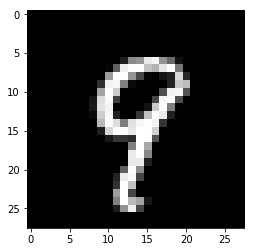

In [34]:
#Accuracy of Decision Tree Classifier
pred_dtc = clf_dtc.predict(test_digit)

count = 0
for i in range(0,21000):
    count+=1 if pred_dtc[i] == test_label[i] else 0
print ('Accuracy:', (count/21000)*100)

# Prediction
test_img1 = test_digit[3]

pred1 = (clf_dtc.predict(test_img1))
print ('\nPredicted No is:', pred1[0])

#Actual Image
test_img1.shape=(28,28)
plt.imshow(test_img1, cmap='gray')
plt.show()

### Accuracy of model is 83.76%

##### I have cross tested this model by predicting random number from Test dataset & verifying it by displaying actual image of that digit. Here Model predicted Number 9 & also that image is of digit 9, Hence our model is predicting correct result.

#  6. Checking Accuracy of Random Forest Classifier & Cross Testing it.

Accuracy: 92.63809523809525

Predicted No is: 9


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


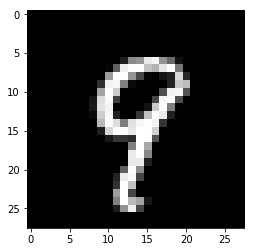

In [37]:
#Accuracy of Random Forest Classifier

pred_rfc = clf_rfc.predict(test_digit)

count = 0
for i in range(0,21000):
    count+=1 if pred_rfc[i] == test_label[i] else 0
print ('Accuracy:', (count/21000)*100)

# Prediction
test_img2 = test_digit[3]

pred2 = (clf_rfc.predict(test_img2))
print ('\nPredicted No is:', pred2[0])

#Actual Image
test_img2.shape=(28,28)
plt.imshow(test_img2, cmap='gray')
plt.show()

### Accuracy of model is 92.63%

##### I have cross tested this model by predicting random number from Test dataset & verifying it by displaying actual image of that digit. Here Model predicted Number 9 & also that image is of digit 9, Hence our model is predicting correct result.

# 7. Selecting best Model & Training it with full dataset.

#### Accuracy of Decision Tree Classifier is 83.76%.
#### Accuracy of Random Forest Classifier is 92.63%.
#### So we will select Random Forest Classifier and Train it with full dataset.

In [38]:
bw_digit = pd.read_csv('bw_digit_dataset.csv').as_matrix()
print (len(bw_digit))

42000

In [46]:
clf = RandomForestClassifier()

bw_train = bw_digit[:42000, 1:]
bw_train_label = bw_digit[:42000, 0]

clf.fit(bw_train, bw_train_label)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

##### I used another dataset which is generated from above (main 'train.csv') dataset, Because I want to train my model based on standard input which will be provided to it for predicting some random digits (images). I have converted images of main dataset into Black&White & created 'bw_digit_dataset.csv'. I have provided 'bw_digit_dataset.csv' with this project.

### Now Our Model is Trained & Ready to Predict Digits provided by Users.

# 8. Testing Model.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)



Predicted No is: 3


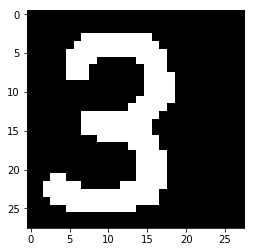

In [54]:
### Provide image path that has to be predicted
Test_img_name = 'test.png'


# Converting Images to Black & white

def threshold(imageArray):

    balanceAr = []
    newAr = imageArray
    for eachRow in imageArray:
        for eachPix in eachRow:
            avgNum = mean(eachPix[:3])
            balanceAr.append(avgNum)

    balance = mean(balanceAr)
    for eachRow in newAr:
        for eachPix in eachRow:
            if mean(eachPix[:3]) > balance:
                eachPix[0] = 255
                eachPix[1] = 255
                eachPix[2] = 255
                eachPix[3] = 255
            else:
                eachPix[0] = 0
                eachPix[1] = 0
                eachPix[2] = 0
                eachPix[3] = 255
    return newAr


im = Image.open(Test_img_name)
iar = np.array(im)

iar1 = threshold(iar)
    
# Saving Converted Image into 'test_bw' directory
matplotlib.image.imsave('test_bw/'+Test_img_name, iar1)


# Picking-up Saved converted Image from 'test_bw' directory
test_img_main = scipy.ndimage.imread('test_bw/'+Test_img_name, flatten=False, mode='L')

test_img = test_img_main.tolist()
test_img = [item for sublist in test_img for item in sublist]
test_img = np.asarray(test_img)


# Predicting provided Image (Digit)
pred = (clf.predict(test_img))
print ('\nPredicted No is:', pred[0])

# Displaying Actual Image
test_img_main.shape=(28,28)
plt.imshow(test_img_main, cmap='gray')
plt.show()

## WOW !
### Our Model predicted accurate digit.

### Here I provided random image generated in MS Paint which is displayed above i.e. 3.  Our model predicted it very accurately that the 'Predicted No is : 3 '.

#### * NOTE:
Make sure to provide image of size 28x28 pixel & save it as 'test.png' in same directory where the code is saved.

Also create one empty directory with name 'test_bw' in same directory.